# ***`Brain Tumor Detection using Deep Learning`***:

> Add blockquote



In [ ]:
!file /content/brain.zip

/content/brain.zip: Zip archive data, at least v4.5 to extract, compression method=deflate


# **1.Data Extraction**

In [ ]:
import zipfile
import os

#set path of my zip file
zip_path = "/content/brain.zip"

#extract the data from your zip file to a folder
extract_folder = "brain_dataset"

#check if zip file is valid or not
if zipfile.is_zipfile(zip_path):
  #extract
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

  #check folders inside
  print("Folders Extracted : ")
  print(os.listdir(extract_folder))
else:
  print("Invalid Zip File")




Folders Extracted : 
['yes', 'no']


In [ ]:
import cv2 # for visulization images
import numpy as np

IMG_SIZE = 150
data_dir = "brain_dataset"
categories = ['yes','no']
data = [] # empty list for store image data

for category in categories:
  folder = os.path.join(data_dir,category)
  label= categories.index(category) #label: 0 for yes, 1 for no

  for img_name in os.listdir(folder):
    img_path = os.path.join(folder, img_name) #joins the folder name and the image file name to create the full path.

    try:
      img = cv2.imread(img_path) # read the images
      img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) # resize the images 150*150 pixcel
      data.append([img, label])
    except:
      print(f"Skipped images : {img_path}")






In [ ]:
# List filles in the 'yes' and 'no' directories
yes_files = os.listdir(os.path.join(extract_folder,'yes'))
no_files = os.listdir(os.path.join(extract_folder,'no'))

# as a sample
print("Files in 'yes' folder : ", yes_files[:5] )
print("Files in 'no' folder : ", no_files[:5] )

Files in 'yes' folder :  ['Y156.JPG', 'Y77.jpg', 'Y85.JPG', 'Y31.jpg', 'Y66.JPG']
Files in 'no' folder :  ['no 100.jpg', 'N21.jpg', 'no 95.jpg', 'no 91.jpeg', 'no 10.jpg']


In [ ]:
from sklearn.model_selection import train_test_split as tts

X=[]
y=[]

for feature,label in data:
  X.append(feature)
  y.append(label)

X= np.array(X) / 255.0 # for Normalize the value
y= np.array(y)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3),activation ='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation ='relu'),
    Dropout(0.3),
    Dense(1, activation = 'sigmoid') # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5347 - loss: 1.9738 - val_accuracy: 0.5294 - val_loss: 0.8756
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6526 - loss: 0.7014 - val_accuracy: 0.8235 - val_loss: 0.5454
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8057 - loss: 0.4161 - val_accuracy: 0.8235 - val_loss: 0.5144
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8131 - loss: 0.4170 - val_accuracy: 0.8235 - val_loss: 0.4943
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8644 - loss: 0.3178 - val_accuracy: 0.8431 - val_loss: 0.4966
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9124 - loss: 0.2003 - val_accuracy: 0.8039 - val_loss: 0.4859
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9577 - loss: 0.1373 - val_accuracy: 0.8039 - val_loss: 0.5075
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9973 - loss: 0.0726 - val_accuracy: 0.8039 - val_loss: 0.5282
Epoch 9/10

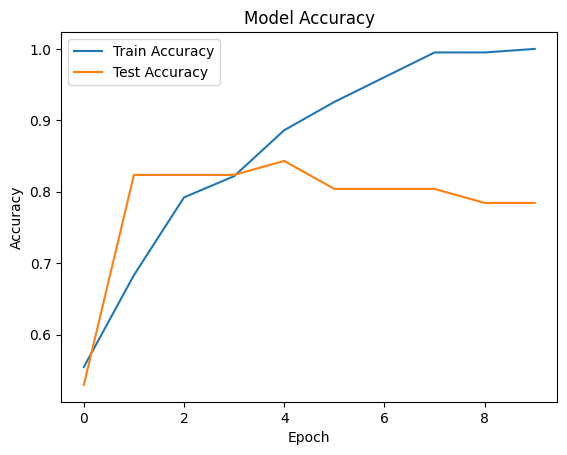

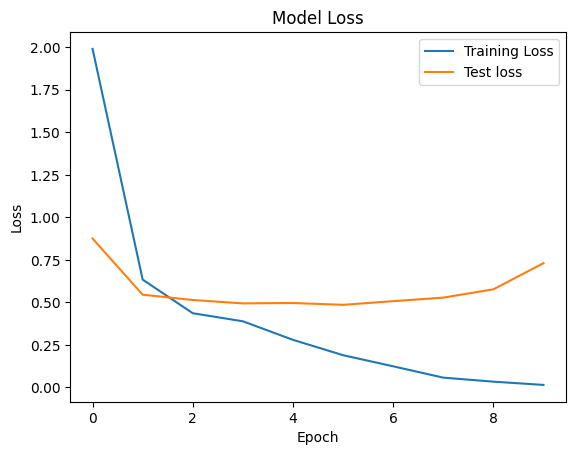

In [ ]:
import matplotlib.pyplot as plt

#Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

#Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label ='Test loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



In [ ]:
#Predict on test set
predictions = model.predict(X_test)

#Convert probabilities to 0 or 1
predictions = [1 if p > 0.5 else 0 for p in predictions]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step


In [ ]:
#example
print("Predicted : ", predictions[0])
print("Actual : ", y_test[0])

Predicted :  0
Actual :  1


In [ ]:
for i in range(10):
    print(f"Predicted: {predictions[i]} | Actual: {y_test[i]}")


Predicted: 0 | Actual: 1
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 0
Predicted: 1 | Actual: 1
Predicted: 0 | Actual: 0
Predicted: 0 | Actual: 1
Predicted: 1 | Actual: 1
Predicted: 1 | Actual: 1
Predicted: 1 | Actual: 0
Predicted: 1 | Actual: 0


In [ ]:
from sklearn.metrics import accuracy_score
print("Test Accuracy : ", accuracy_score(y_test,predictions)*100)

Test Accuracy :  78.43137254901961


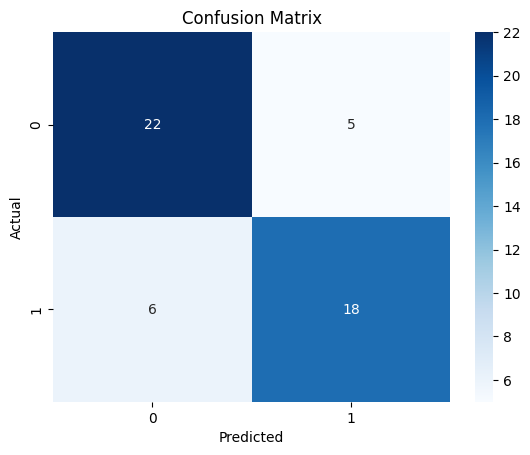

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
